# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | igarka
Processing Record 2 of Set 1 | qamdo
Processing Record 3 of Set 1 | port saint john's
Processing Record 4 of Set 1 | creel
Processing Record 5 of Set 1 | rikaze
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | solleftea
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | derbent
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | alotau
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | st. john's
Processing Record 16 of Set 1 | kalmunai
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | kapuskasing
Processing Record 21 of Set 1 | polyarnyy
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | marsa 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

current_date = datetime.now()
city_datetime = datetime.utcfromtimestamp(city_date)
formatted_date = city_datetime.strftime('%Y-%m-%d')
#print(formatted_date)

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,igarka,67.4667,86.5833,-13.00,89,100,6.68,RU,1733447052
1,qamdo,31.1667,97.2333,-4.68,52,0,0.84,CN,1733447053
2,port saint john's,-31.6229,29.5448,20.76,89,100,2.91,ZA,1733447054
3,creel,27.7500,-107.6333,5.12,42,1,2.59,MX,1733447055
4,rikaze,29.2500,88.8833,-2.03,25,0,0.50,CN,1733447056


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
#function for scatter plots
def scatter_plot(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="lightblue", marker="h", edgecolor="black")
    plt.tight_layout()
    plt.grid()

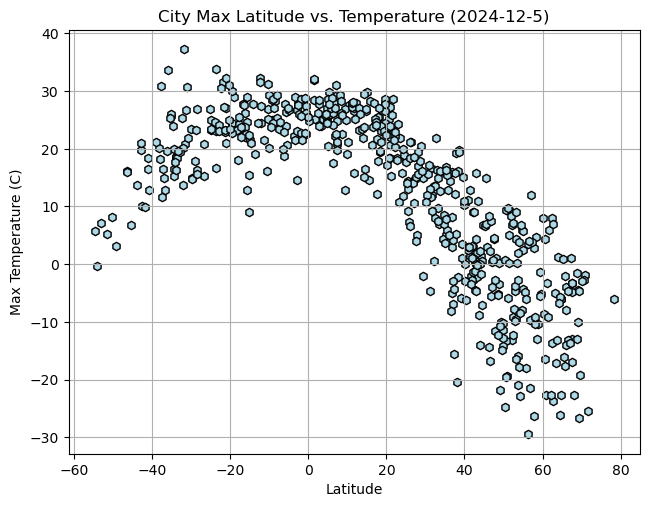

In [9]:
# Build scatter plot for latitude vs. temperature
scatter_plot("Lat", "Max Temp")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

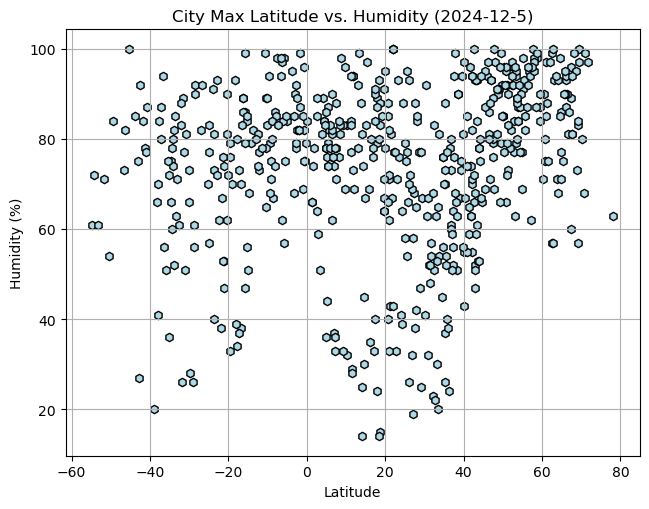

In [10]:
# Build the scatter plots for latitude vs. humidity
scatter_plot("Lat", "Humidity")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

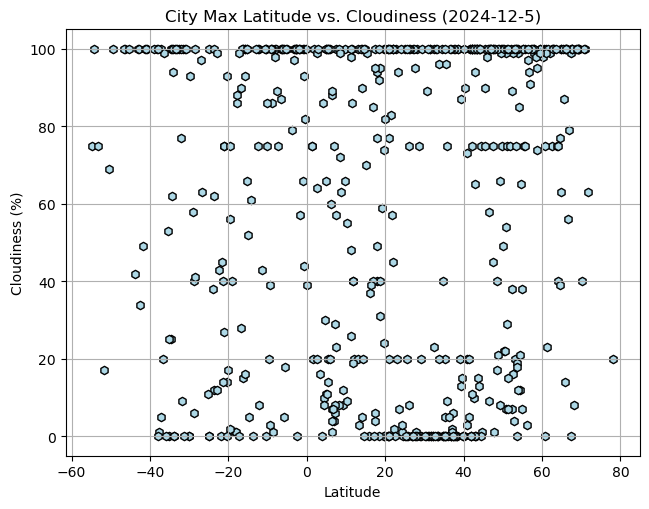

In [11]:
# Build the scatter plots for latitude vs. cloudiness
scatter_plot("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

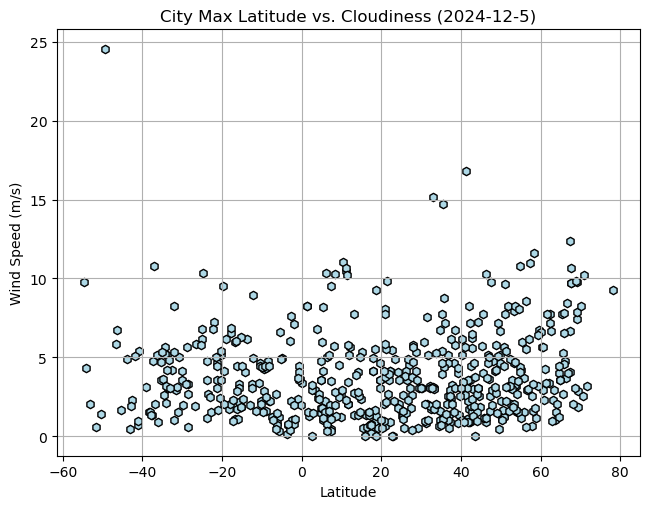

In [12]:
# Build the scatter plots for latitude vs. wind speed
scatter_plot("Lat","Wind Speed")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    print(f"The r^2 Value is: {r_value**2:}")

    return slope, intercept

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,igarka,67.4667,86.5833,-13.00,89,100,6.68,RU,1733447052
1,qamdo,31.1667,97.2333,-4.68,52,0,0.84,CN,1733447053
3,creel,27.7500,-107.6333,5.12,42,1,2.59,MX,1733447055
4,rikaze,29.2500,88.8833,-2.03,25,0,0.50,CN,1733447056
5,anadyr,64.7500,177.4833,-22.72,77,63,4.00,RU,1733446911


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port saint john's,-31.6229,29.5448,20.76,89,100,2.91,ZA,1733447054
6,port mathurin,-19.6833,63.4167,24.49,76,56,9.55,MU,1733447058
10,waitangi,-43.9535,-176.5597,13.79,85,42,4.92,NZ,1733446819
11,codrington,-38.2667,141.9667,20.22,66,100,1.55,AU,1733447064
12,alotau,-10.3069,150.4462,31.22,65,100,2.23,PG,1733447065


###  Temperature vs. Latitude Linear Regression Plot

The r^2 Value is: 0.729127419982578


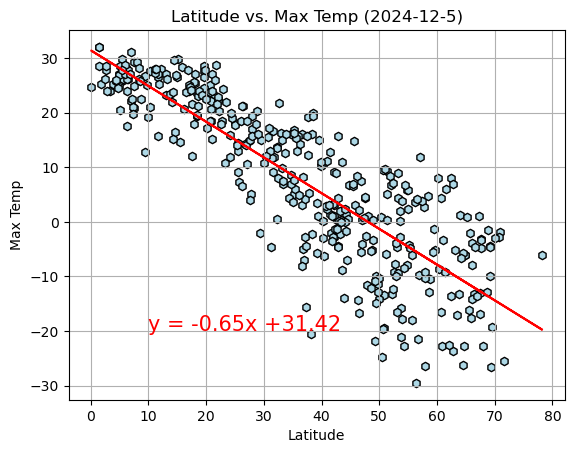

In [16]:
# Linear regression on Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Max Temp ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.3202458834598396


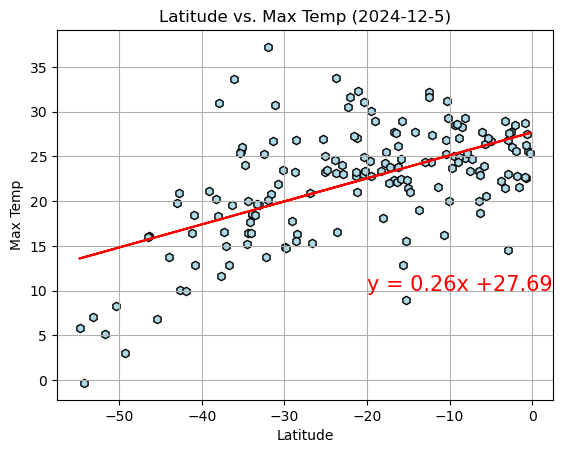

In [17]:
# Linear regression on Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Max Temp ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

The result from the data showed that there is a strong negative correlation between latitude and max temperature for northern hemisphere. Whereas, there is a moderate positive correlation between latitude and max temperature for southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 Value is: 0.09368785870809415


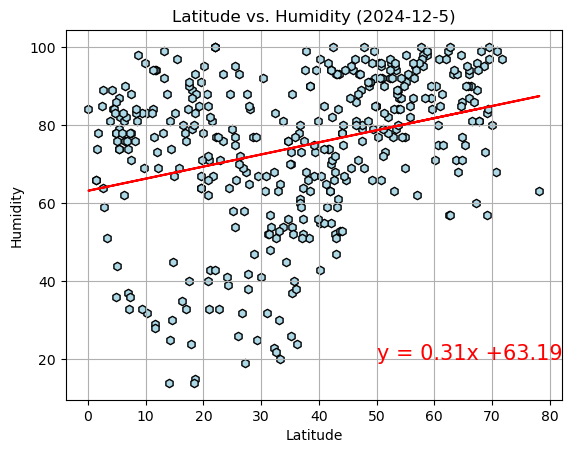

In [18]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Humidity ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.07241485023014424


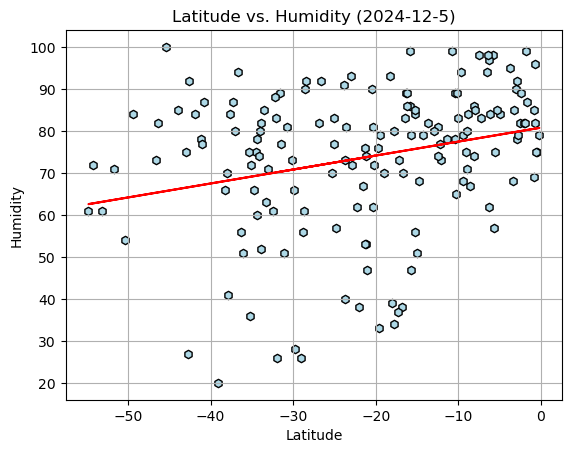

In [19]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Humidity ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

There is little to no relationship between latitude and humidity based on the data available. 
The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humdity. 
The scatter points exhibit that the data is too spread for there to be any reliable correlation between latitude and humidity.
Both the Northern and Souther Hemispheres exhibit a weak correlations between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 Value is: 0.05102136701168604


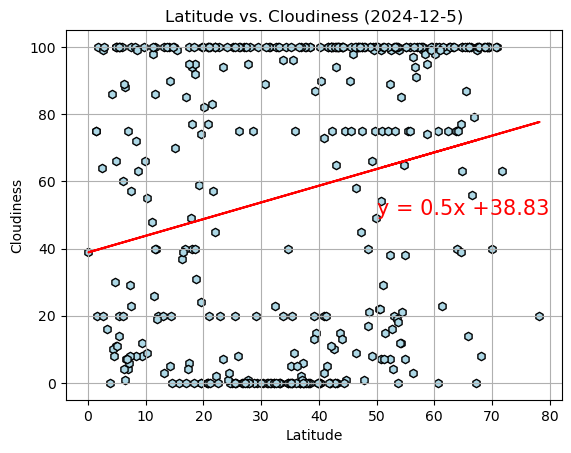

In [20]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Cloudiness ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.012130528675180052


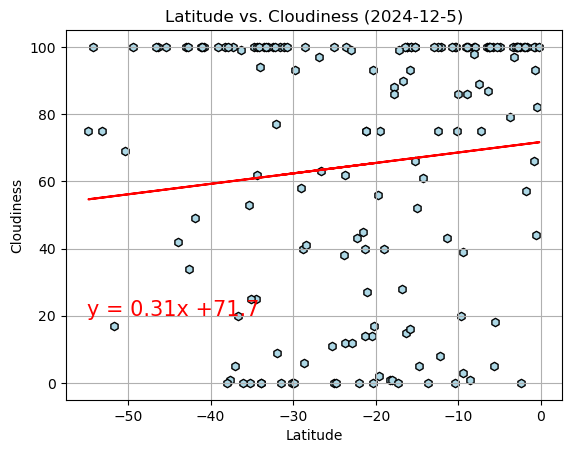

In [21]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Cloudiness ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** 

The result from the data showed that there is a very week, almost none negative correlation between Cloudiness and Latitude in the Southern Hemisphere cities.Whereas there is a a weak positive correlation between latitude and cloudiness for Northern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 Value is: 0.04141097453118992


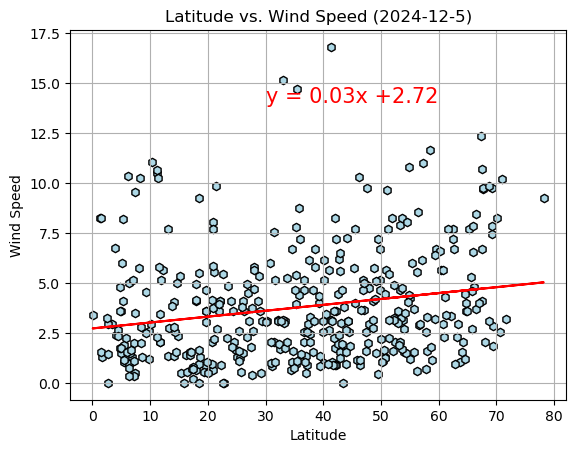

In [22]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Wind Speed ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(30,14),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.03967070466300262


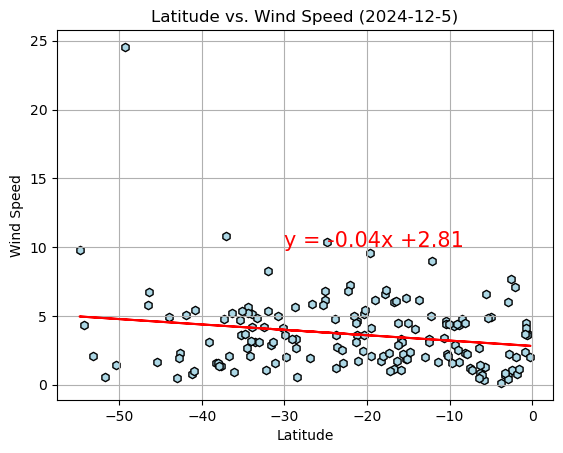

In [23]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title(f"Latitude vs. Wind Speed ({current_date.year}-{current_date.month}-{current_date.day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

The Northern Hemisphere plot is a linear regression model between Wind Speed and latitude. 
The result from the data showed that there is a very week, positive correlation between Wind Speed and Latitude in the Northern Hemisphere cities.
And there is a very week, negative correlation between Wind Speed and Latitude in the Southern Hemisphere cities.

